## Лабораторная работа №3

## Вариант №8

# Выполнил Бубнов Евгений 19_ивт_2

In [55]:
# Подключаем библиотеки
from pandas import read_csv,concat,DataFrame,get_dummies
import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                             average_precision_score)

In [56]:
# Подгружаем данные
df = read_csv(r"zoo.csv",",")

### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт)

#### Этот набор данных состоит из 101 жиаотного из зоопарка. 16 показателей с различными чертами для описания животных. Существует 7 типов: млекопитающие, птицы, рептилии, рыбы, амфибии, жуки и беспозвоночные.
#### Атрибуты:

| Переменная   | Описание  | Параметры(Ключи)  | 
|:--------------|:--------------|:-------------------|
| animal_name | индивидуальное имя для каждого животного  | строковый|
| hair | волосы | логический |
| feathers | перья | логический |
| eggs | яйца | логический |
| milk | молоко | логический |
| airborne | воздушный | логический |
| aquatic | водный | логический |
| predator | хищник | логический |
| toothed | зубастый | логический |
| backbone | позвоночный | логический |
| breathes | дышащий | логический  |
| venomous | ядовитый | логический |
| legs Numeric | количество ног | {0,2,4,5,6,8} |
| tail | хвостатые | логический |
| domestic | домашние | логический |
| catsize | размером с кота | логический |

### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [57]:
df.size

1818

In [58]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [59]:
df = df.drop_duplicates()
df = df.dropna()
df.drop(['animal_name'], axis=1, inplace=True)
data_set = df.copy()
data_set.shape

(101, 17)

In [60]:
data_set.size

1717

### 3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

In [61]:
data_set.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


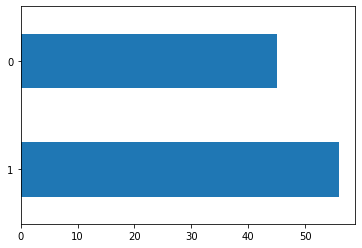

In [62]:
data_set['predator'].value_counts().plot(kind='barh')
plt.show()

#### Соотношение количество элементов несколько отличается, поэтому будем считать, что классы несбалансированны. Будем использовать ROC-кривую, т.к. она дает адекватную оценку качества работы алгоритма, где классы несбалансированны и их размеры выборки отличаются друг от друга несущественно (не на порядок)

## 4. Выполните масштабирование количественных признаков

In [63]:
numerical_columns = [i for i in data_set.columns if data_set[i].dtype.name != 'object']
categorial_columns = [i for i in data_set.columns if data_set[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']
categorial:  []


In [64]:
data_set['class_type'] = data_set['class_type'].apply(lambda x: str(x))

#заново выделим категориальные и числовые
numerical_columns = [i for i in data_set.columns if data_set[i].dtype.name != 'object']
categorial_columns = [i for i in data_set.columns if data_set[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
categorial:  ['class_type']


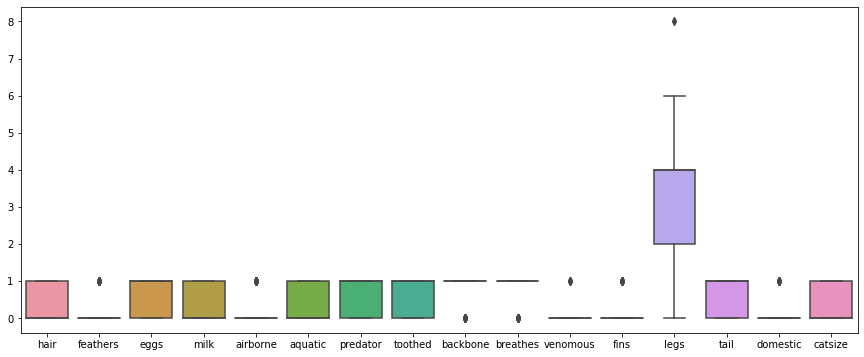

In [65]:
plt.figure(figsize=(15,6))
sns.boxplot(data=data_set[numerical_columns])
plt.show()

In [66]:
scaler = MinMaxScaler()
data_set[numerical_columns] = scaler.fit_transform(data_set[numerical_columns])

data_set.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0,1
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0,1
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0,1
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0,1


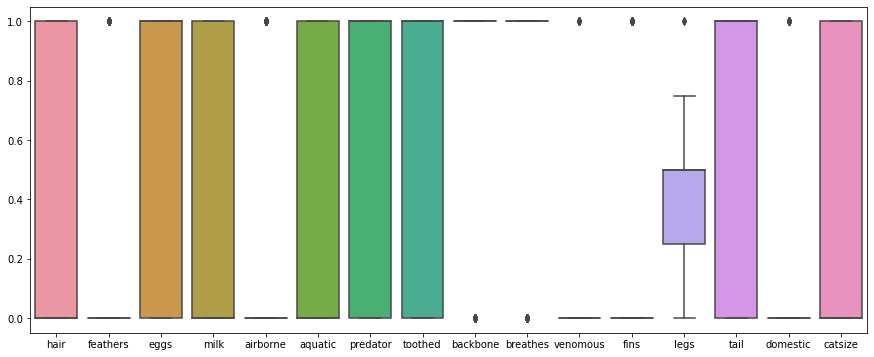

In [67]:
plt.figure(figsize=(15,6))
sns.boxplot(data=data_set[numerical_columns])
plt.show()

## 5. Выполните замену категориальных признаков

In [68]:
def find_cat (data):
    for name in data.columns:
        s = ''
        s += name
        if (type(data[name][0]) == str):
            s += ' строка, '
        if (data[name].nunique() <= 3):
            s+= ' мало уникальных, '
        if (data[name].nunique() >= 4):
            s+= ' много уникальных, '
        if (s != name):
            print(s+str(data[name].nunique()))
find_cat(data_set)

hair мало уникальных, 2
feathers мало уникальных, 2
eggs мало уникальных, 2
milk мало уникальных, 2
airborne мало уникальных, 2
aquatic мало уникальных, 2
predator мало уникальных, 2
toothed мало уникальных, 2
backbone мало уникальных, 2
breathes мало уникальных, 2
venomous мало уникальных, 2
fins мало уникальных, 2
legs много уникальных, 6
tail мало уникальных, 2
domestic мало уникальных, 2
catsize мало уникальных, 2
class_type строка,  много уникальных, 7


In [69]:
data_set

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0,1
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,1
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0,4
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0,1
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0,1
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0,6
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,1
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,7


In [70]:
for i in categorial_columns:
    print(i,': ', data_set[i].unique())
    classes = data_set[i].unique()

class_type :  ['1' '4' '2' '7' '6' '5' '3']


In [71]:
# выделим бинарные и небинарные признаки
binary_columns = [i for i in categorial_columns if len(data_set[i].unique()) == 2]
nonbinary_columns = [i for i in categorial_columns if len(data_set[i].unique()) > 2]
    
# для бинарных заменим значения на 1 и 0
for col in binary_columns:
    for i, unic_item in enumerate(data_set[col].unique()):
        data_set[col] = data_set[col].replace(to_replace=[unic_item], value=[i])
        
# для не бинарых применим dummy-кодирование
data_set_nonbinary = get_dummies(data_set[nonbinary_columns])
data_set.drop(nonbinary_columns, axis=1, inplace=True)
df = concat([data_set_nonbinary, df] , axis=1)

print(data_set.shape)
data_set.head()

(101, 16)


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0


## 6. Оцените корреляцию между признаками и удалите те признаки, которые коррелируют с наибольшим числом других

In [72]:
data_set.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0


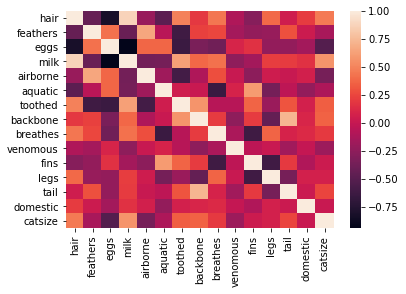

In [73]:
corr_matrix = data_set.drop('predator', axis=1).corr()
sns.heatmap(corr_matrix)
plt.show()

In [74]:
corr_matrix

,hair,feathers,eggs,milk,airborne,aquatic,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125
venomous,-0.104245,-0.145739,0.098689,-0.242449,0.008528,0.087915,-0.062344,-0.246611,-0.120752,1.000000,-0.033956,0.022964,-0.162724,-0.003252,-0.183748


In [75]:
del data_set['eggs']
data_set.head()

,hair,feathers,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0


### 7.	Заполните пропущенные значения в данных

In [76]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hair      101 non-null    float64
 1   feathers  101 non-null    float64
 2   milk      101 non-null    float64
 3   airborne  101 non-null    float64
 4   aquatic   101 non-null    float64
 5   predator  101 non-null    float64
 6   toothed   101 non-null    float64
 7   backbone  101 non-null    float64
 8   breathes  101 non-null    float64
 9   venomous  101 non-null    float64
 10  fins      101 non-null    float64
 11  legs      101 non-null    float64
 12  tail      101 non-null    float64
 13  domestic  101 non-null    float64
 14  catsize   101 non-null    float64
dtypes: float64(15)
memory usage: 17.6 KB


#### Пропуски отсутствуют

### 8. Решите поставленную задачу классификации в соответствии с заданием

- линейный классификатор (персептрон);
- метод k ближайших соседей(радиус)

In [77]:
# разделим полученные данные на данные для обучения и теста
X, y = data_set.drop('predator', axis=1), data_set['predator']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 140)

print(X_train)
print(y_train)


    hair  feathers  milk  airborne  aquatic  toothed  backbone  breathes  \
50   1.0       0.0   1.0       0.0      0.0      1.0       1.0       1.0   
30   0.0       0.0   0.0       1.0      0.0      0.0       0.0       1.0   
8    0.0       0.0   0.0       0.0      1.0      1.0       1.0       0.0   
14   0.0       0.0   0.0       0.0      1.0      0.0       0.0       0.0   
63   1.0       0.0   1.0       0.0      1.0      0.0       1.0       1.0   
..   ...       ...   ...       ...      ...      ...       ...       ...   
80   0.0       0.0   0.0       0.0      0.0      1.0       1.0       1.0   
77   0.0       0.0   0.0       0.0      1.0      0.0       0.0       0.0   
22   1.0       0.0   1.0       0.0      0.0      1.0       1.0       1.0   
23   0.0       1.0   0.0       1.0      0.0      0.0       1.0       1.0   
38   0.0       0.0   0.0       0.0      1.0      1.0       1.0       0.0   

    venomous  fins  legs  tail  domestic  catsize  
50       0.0   0.0  0.50   1.0     

In [78]:
# Перцептрон
slf = Perceptron()
paramsearch = GridSearchCV(estimator=slf, param_grid=dict(alpha=np.linspace(0,1,20)[1:],max_iter=[x for x in range(1,22)]), n_jobs=-1)
paramsearch.fit(X_train, y_train)
best_score = paramsearch.best_score_
selected_alpha = paramsearch.best_estimator_.alpha
selected_max_iter = paramsearch.best_estimator_.max_iter
print('best score:',best_score,'| alpha:',selected_alpha, '| max_iter:', selected_max_iter)

perceptron = sk.linear_model.Perceptron(alpha=selected_alpha,max_iter=selected_max_iter)
perceptron.fit(X_train, y_train)
test_score  = np.mean(y_test == perceptron.predict(X_test))
print('test score: ', test_score)

best score: 0.6714285714285715 | alpha: 0.05263157894736842 | max_iter: 6
test score:  0.4838709677419355


In [79]:
#**********************************************************************
# grid search radius for radius neighbors classifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import svm

rnc  = RadiusNeighborsClassifier()

params = dict() 
params['radius'] = np.arange(5.0, 6.5, 0.01)

rnc_grid = GridSearchCV(rnc, params, scoring='accuracy', n_jobs=-1)

rnc_grid.fit(X_train, y_train)
print('Mean Accuracy: %.3f' % rnc_grid.best_score_)
print('Config: %s' % rnc_grid.best_params_)

rnc = RadiusNeighborsClassifier(rnc_grid.best_params_['radius'])
rnc.fit(X_train, y_train)

err_train = np.mean(y_train != rnc.predict(X_train))
err_test  = np.mean(y_test  != rnc.predict(X_test))
print('train', 1-err_train, 'test: ', 1-err_test)


Mean Accuracy: 0.529
Config: {'radius': 5.0}
train 0.5285714285714286 test:  0.6129032258064516


#### Для построения ROC и PR кривых необходимо получить вероятности принадлежности примера к одному из классов, а затем варьировать границу выбора класса. Вероятности можно получить с помощью метода predict_proba

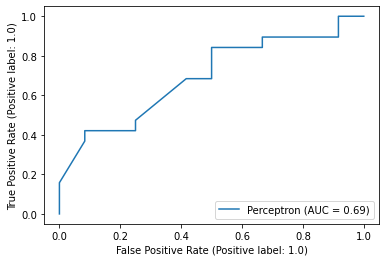

In [80]:
import matplotlib.pyplot as plt  
from sklearn import metrics

perceptron = sk.linear_model.Perceptron(alpha=selected_alpha,max_iter=selected_max_iter)
perceptron.fit(X_train, y_train)
clf = perceptron
metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()

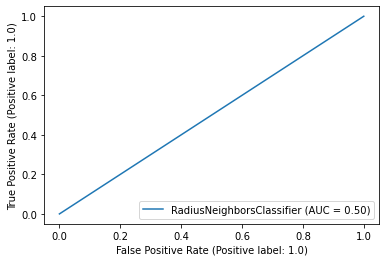

In [81]:
import matplotlib.pyplot as plt  
from sklearn import metrics

rnc = RadiusNeighborsClassifier(rnc_grid.best_params_['radius'])
rnc.fit(X_train, y_train)
clf = rnc
metrics.plot_roc_curve(clf, X=X_test, y=y_test)  
plt.show()

#### Данные классификаторы решают задачу классификации с вероятностью 0.69~0.83, что является хорошим результатом, т.к. классов всего 2. 